## Plot memory capacity performance (with shaded areas) for all connectomes

In [1]:
%load_ext autoreload
%autoreload 2
from imports_paper_plots import *
set_context_and_font()
set_rcParams_color()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
task_name = "memory-capacity"
neuron_density = 1
results_dir_path = Path(os.environ["DATAICNS"])/"bioRNN"/f"{task_name}"
figs_path = Path(os.environ["DATAICNS"])/"bioRNN" /f"{task_name}/figs"
results_evalution_path = results_dir_path/"evaluation"/ f"neuron-density-{neuron_density}"/ "all"

In [3]:
results = pd.read_csv(results_evalution_path)
print(results.shape)
results.head(3)

(3000, 9)


,connectome,rand_partition,neuron_density,W,bias,input_scaling,n_transient,spectral_radius,mean_test_memory_capacity
0,macaque,True,1,bio_rank,1,0.00001,100,0.99,7.363316
1,macaque,True,1,bio_norank,1,0.00001,100,0.99,11.749223
2,macaque,True,1,rnd_density,1,0.00001,100,0.99,11.645307


In [4]:
(results.connectome.unique(),
results.rand_partition.unique(),
results.input_scaling.unique(),)

(array(['macaque', 'marmoset', 'human'], dtype=object),
 array([ True, False]),
 array([1.e-05]))

In [5]:
results = results.drop(columns=["n_transient"])
results.head(3)

,connectome,rand_partition,neuron_density,W,bias,input_scaling,spectral_radius,mean_test_memory_capacity
0,macaque,True,1,bio_rank,1,0.00001,0.99,7.363316
1,macaque,True,1,bio_norank,1,0.00001,0.99,11.749223
2,macaque,True,1,rnd_density,1,0.00001,0.99,11.645307


In [6]:
results = refactor_names(df=results, to_rename={"mean_test_memory_capacity": "Memory Capacity",
                                                "connectome": "Connectome"})
results.head(3)

,Connectome,rand_partition,neuron_density,W,bias,input_scaling,spectral_radius,Memory Capacity
0,Macaque,True,1,Bio (rank),1,0.00001,0.99,7.363316
1,Macaque,True,1,Bio (no-rank),1,0.00001,0.99,11.749223
2,Macaque,True,1,Random (density),1,0.00001,0.99,11.645307


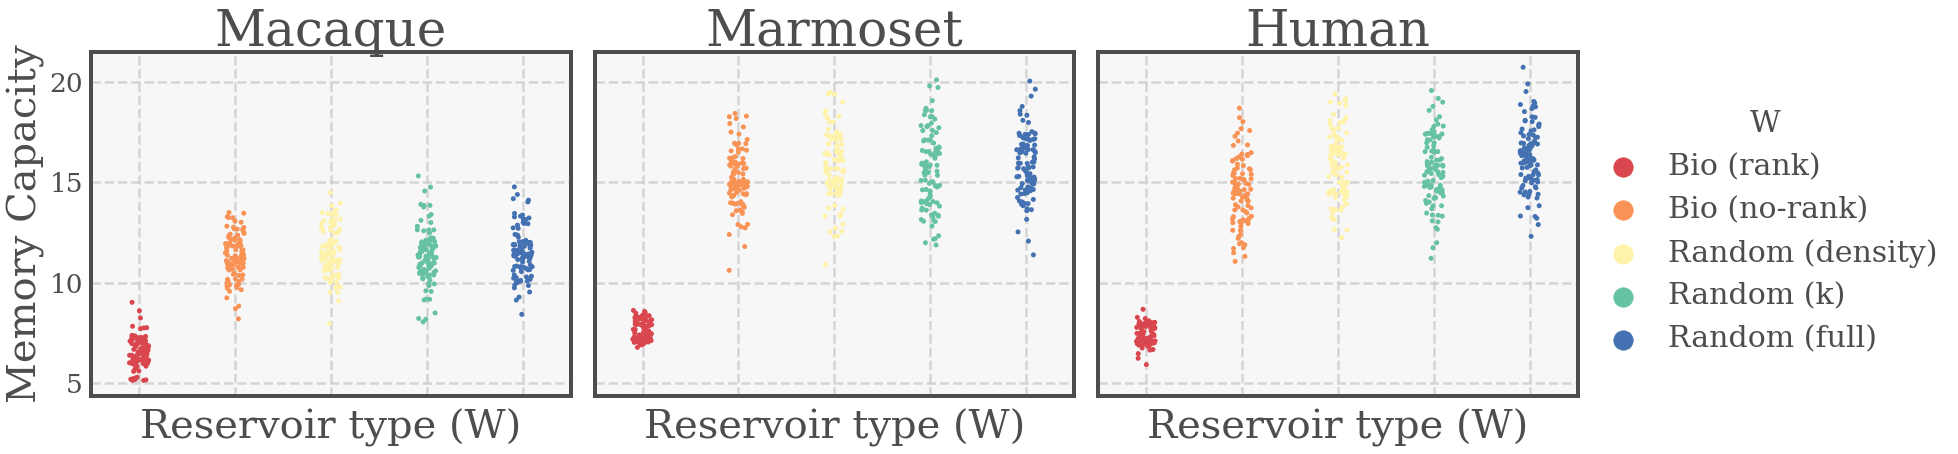

In [47]:
data = results[results.rand_partition == False]
g = sns.catplot(
    data=data,
    x="W",
    y="Memory Capacity",
    col="Connectome",
    row="rand_partition",
    hue="W",
    height=6.5,
    aspect=1.18,
    palette=my_palette,
    #ci="sd",
    legend_out= True,
    margin_titles=True,
    #kind="box",
    #linewidth=3.,
    #width=.9,
)

g.set_axis_labels(y_var="Memory Capacity", x_var="Reservoir type (W)", fontsize=40)
g.set_xticklabels(labels=[],)
g.fig.subplots_adjust(wspace=0.05,)
g.add_legend(markerscale=2.5, handletextpad=.5, fontsize=30, title="W",)
g._legend.set_bbox_to_anchor((.52, .1, .45, .75))
g._legend.set_title("W", prop={"size": 30})

set_facetgrid_titles(g, col_template='{col_name}',size=50, row_template="", )
tweak_axes(g.axes, grid_axis="both")

g.savefig(figs_path/"evaluation"/
          f"neuron-density-{neuron_density}"
          /"memory-capacity_vs_W.svg")
#plt.close()